<a href="https://colab.research.google.com/github/JayJihyunKim/workbooks/blob/main/NLP_Practise.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Tokenization


In [ ]:
en_text = "We are the best company in the world!"

#spaCy
import spacy
spacy_en = spacy.load('en') 

def tokenize(en_text):
  return [tok.text for tok in spacy_en.tokenizer(en_text)]

print(tokenize(en_text))

['We', 'are', 'the', 'best', 'company', 'in', 'the', 'world', '!']


# **spaCy의 동작방법 이해**

(참조 : https://yujuwon.tistory.com/entry/spaCy-%EC%82%AC%EC%9A%A9%ED%95%98%EA%B8%B0-tokenization)


공백을 기준으로 먼저 분리한 다음 prefix->exception->suffix->exception->infix->exception 순으로 tokenizing 한다.
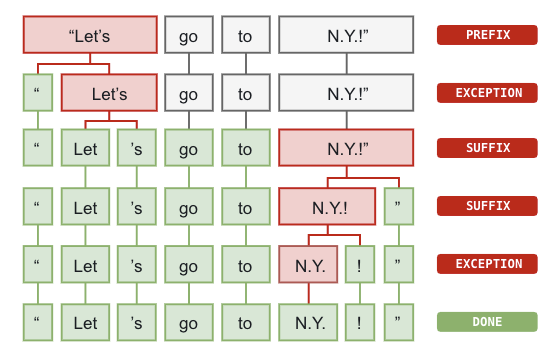



In [ ]:
import spacy
from spacy.symbols import ORTH, LEMMA, POS, TAG

spacy_en = spacy.load('en')
doc = spacy_en(u'gimme that')

for token in doc:
  print("token - {}, lemma - {}".format(token, token.lemma_))

token - gimme, lemma - gimme
token - that, lemma - that


In [ ]:
#add special rule

special_case = [{ORTH:u'gim', LEMMA:u'give', POS:u'VERB'}, {ORTH:u'me'}]
spacy_en.tokenizer.add_special_case(u'gimme', special_case)

doc = spacy_en(u'gimme that')
for token in doc:
  print("token - {}, lemma - {}".format(token, token.lemma_))

token - u'gimme, lemma - u'gimme
token - that, lemma - that


In [ ]:
nlp = spacy.load('en')

text = """Success isn't easy, and that's a good thing - at least in business. \
If it was easy, everybody would be doing it and your competition would be outrageous!"""

text = "Success isn't easy, and that's a good thing - at least in business. \
but It's special"

doc = nlp(text)

tokenized =[token.text for token in doc]

print(tokenized)


['Success', 'is', "n't", 'easy', ',', 'and', 'that', "'s", 'a', 'good', 'thing', '-', 'at', 'least', 'in', 'business', '.', 'but', 'It', "'s", 'special']


# NLTK, Mecab

In [1]:
!git clone https://github.com/SOMJANG/Mecab-ko-for-Google-Colab.git
%cd Mecab-ko-for-Google-Colab
!bash install_mecab-ko_on_colab190912.sh

Cloning into 'Mecab-ko-for-Google-Colab'...
remote: Enumerating objects: 75, done.
remote: Counting objects: 100% (75/75), done.
remote: Compressing objects: 100% (70/70), done.
remote: Total 75 (delta 33), reused 21 (delta 5), pack-reused 0
Unpacking objects: 100% (75/75), done.
/content/Mecab-ko-for-Google-Colab
Installing konlpy.....
     |████████████████████████████████| 19.4MB 1.2MB/s 
     |████████████████████████████████| 460kB 51.0MB/s 
     |████████████████████████████████| 92kB 10.7MB/s 
  Found existing installation: beautifulsoup4 4.6.3
    Uninstalling beautifulsoup4-4.6.3:
      Successfully uninstalled beautifulsoup4-4.6.3
  Found existing installation: tweepy 3.6.0
    Uninstalling tweepy-3.6.0:
      Successfully uninstalled tweepy-3.6.0
Done
Installing mecab-0.996-ko-0.9.2.tar.gz.....
from https://bitbucket.org/eunjeon/mecab-ko/downloads/mecab-0.996-ko-0.9.2.tar.gz
--2021-01-14 00:15:56--  https://bitbucket.org/eunjeon/mecab-ko/downloads/mecab-0.996-ko-0.9.2.tar.gz

In [2]:
#형태소 토큰화
from konlpy.tag import Mecab
tokenizer = Mecab()

kor_text = "사과의 놀라운 효능이라는 글을 봤어. 그래서 오늘 사과를 먹으려고 했는데 사과가 썩어서 슈퍼에 가서 사과랑 오렌지 사왔어"

print(tokenizer.morphs(kor_text))

['사과', '의', '놀라운', '효능', '이', '라는', '글', '을', '봤', '어', '.', '그래서', '오늘', '사과', '를', '먹', '으려고', '했', '는데', '사과', '가', '썩', '어서', '슈퍼', '에', '가', '서', '사과', '랑', '오렌지', '사', '왔', '어']


In [4]:
# 단어 집합(Vocabulary) 생성

import urllib.request
import pandas as pd
from konlpy.tag import Mecab
from nltk import FreqDist
import numpy as np
import matplotlib.pyplot as plt


In [7]:
# 네이버 영화리뷰 데이터 다운로드

urllib.request.urlretrieve("https://raw.githubusercontent.com/e9t/nsmc/master/ratings.txt", filename="ratings.txt")
data = pd.read_table('ratings.txt') # 데이터프레임에 저장
print(data[:10])

print('전체 샘플 수 : {}'.format(len(data)))

#100개 샘플데이터 저장
sample_data = data[:100]

#regular expression
sample_data['document'] = sample_data['document'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]","") #replace(old, new, [count]) -> replace("찾을값", "바꿀값", [바꿀횟수])
sample_data[:10]


         id                                           document  label
0   8112052                                어릴때보고 지금다시봐도 재밌어요ㅋㅋ      1
1   8132799  디자인을 배우는 학생으로, 외국디자이너와 그들이 일군 전통을 통해 발전해가는 문화산...      1
2   4655635               폴리스스토리 시리즈는 1부터 뉴까지 버릴께 하나도 없음.. 최고.      1
3   9251303  와.. 연기가 진짜 개쩔구나.. 지루할거라고 생각했는데 몰입해서 봤다.. 그래 이런...      1
4  10067386                        안개 자욱한 밤하늘에 떠 있는 초승달 같은 영화.      1
5   2190435                      사랑을 해본사람이라면 처음부터 끝까지 웃을수 있는영화      1
6   9279041                                   완전 감동입니다 다시봐도 감동      1
7   7865729                        개들의 전쟁2 나오나요? 나오면 1빠로 보고 싶음      1
8   7477618                                                  굿      1
9   9250537                                     바보가 아니라 병 쉰 인듯      1
전체 샘플 수 : 200000


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]


,id,document,label
0,8112052,어릴때보고 지금다시봐도 재밌어요ㅋㅋ,1
1,8132799,디자인을 배우는 학생으로 외국디자이너와 그들이 일군 전통을 통해 발전해가는 문화산업...,1
2,4655635,폴리스스토리 시리즈는 부터 뉴까지 버릴께 하나도 없음 최고,1
3,9251303,와 연기가 진짜 개쩔구나 지루할거라고 생각했는데 몰입해서 봤다 그래 이런게 진짜 영화지,1
4,10067386,안개 자욱한 밤하늘에 떠 있는 초승달 같은 영화,1
5,2190435,사랑을 해본사람이라면 처음부터 끝까지 웃을수 있는영화,1
6,9279041,완전 감동입니다 다시봐도 감동,1
7,7865729,개들의 전쟁 나오나요 나오면 빠로 보고 싶음,1
8,7477618,굿,1
9,9250537,바보가 아니라 병 쉰 인듯,1


In [8]:
text = '123,456,789,999'

replaceAll= text.replace(",","")
replace_t1 = text.replace(",", "",1)
replace_t2 = text.replace(",", "",2)
replace_t3 = text.replace(",", "",3)
print("결과 :")
print(replaceAll)
print(replace_t1)
print(replace_t2)
print(replace_t3)

결과 :
123456789999
123456,789,999
123456789,999
123456789999


In [9]:
#Tokenizing

stopwords=['의','가','이','은','들','는','좀','잘','걍','과','도','를','으로','자','에','와','한','하다']
tokenizerr = Mecab()

tokenized=[]
for sentence in sample_data['document']:
  temp = []
  temp = tokenizer.morphs(sentence)
  temp = [word for word in temp if not word in stopwords]
  tokenized.append(temp)


print(tokenized[:10])

[['어릴', '때', '보', '고', '지금', '다시', '봐도', '재밌', '어요', 'ㅋㅋ'], ['디자인', '을', '배우', '학생', '외국', '디자이너', '그', '일군', '전통', '을', '통해', '발전', '해', '문화', '산업', '부러웠', '는데', '사실', '우리', '나라', '에서', '그', '어려운', '시절', '끝', '까지', '열정', '을', '지킨', '노라노', '같', '전통', '있', '어', '저', '같', '사람', '꿈', '을', '꾸', '고', '이뤄나갈', '수', '있', '다는', '것', '감사', '합니다'], ['폴리스', '스토리', '시리즈', '부터', '뉴', '까지', '버릴', '께', '하나', '없', '음', '최고'], ['연기', '진짜', '개', '쩔', '구나', '지루', '할거', '라고', '생각', '했', '는데', '몰입', '해서', '봤', '다', '그래', '이런', '게', '진짜', '영화', '지'], ['안개', '자욱', '밤하늘', '떠', '있', '초승달', '같', '영화'], ['사랑', '을', '해', '본', '사람', '라면', '처음', '부터', '끝', '까지', '웃', '을', '수', '있', '영화'], ['완전', '감동', '입니다', '다시', '봐도', '감동'], ['개', '전쟁', '나오', '나요', '나오', '면', '빠', '로', '보', '고', '싶', '음'], ['굿'], ['바보', '아니', '라', '병', '쉰', '인', '듯']]


In [10]:
#Vacab set

vocab = FreqDist(np.hstack(tokenized))
print('단어 집합의 크기 : {}'.format(len(vocab)))

단어 집합의 크기 : 664


In [11]:
vocab['재밌']

10

In [ ]:
vocab_size = 500

vocab = vocab.most_common(vocab_size) #상위 vocab_size개의 단어만 보존